In [356]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

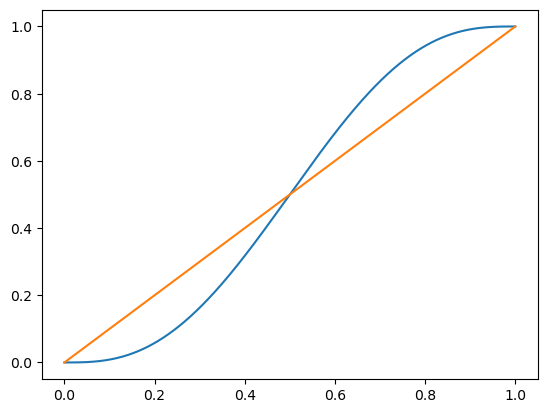

In [357]:
_scalartypes = (int, float, np.int64, np.int32, np.float64)


def isscalar(x) -> bool:
    """Check if parameter is scalar number

    Parameters
    ----------
    x : any
        value to check

    Returns
    -------
    bool
        True if x is int or real  
    """
    return isinstance(x, _scalartypes) or (isinstance(x, np.ndarray) and (x.size==1))

def vector(x, dim=None):
    """Return a vector

    Parameters
    ----------
    x : array-like
        values to be transformed to vector
    dim : int
        required dimension; None: no length check

    Returns
    -------
    ndarray
        array in specified format
    """
    if isinstance(x, (list, tuple)):
        x = np.asarray(x)
    elif isscalar(x):
        x = np.asarray(x)
    elif isinstance(x, np.ndarray):
        x = x.flatten()
    else:
        raise TypeError("Invalid input type")
    if (dim is not None) and x.size != dim:
        raise ValueError("Incorrect vector length")
    return x

def jpoly(q0, q1, t, qd0=None, qd1=None):
    """Trajectory from q0 to q1 using 5th order polynomial

    Parameters
    ----------
    q0 : array of floats
        initial joint positions (n,)
    q1 : array of floats
        final joint position (n,)
    t : array of floats
        trajectory time (nsamp,)
    qd0 : array of floats
        Initial joint velocities (n,)
    qd1 : array of floats
        Final joint velocities (n,)

    Returns
    -------
    array of floats
        interpolated joint position (nsamp, n)
    array of floats
        interpolated joint velocities  (nsamp, n)
    array of floats
        interpolated joint accelerations  (nsamp, n)
    """
    q0 = vector(q0)
    q1 = vector(q1)
    if qd0 is None:
        qd0 = np.zeros(q0.shape)
    else:
        qd0 = vector(qd0)
    if qd1 is None:
        qd1 = np.zeros(q0.shape)
    else:
        qd1 = vector(qd1)
    if q0.size==q1.size and qd0.size==q0.size and qd1.size==q1.size:
        tmax = max(t)
        t = np.copy(vector(t).T)/tmax

        A =   6*(q1-q0)-3*(qd1+qd0)*tmax
        B = -15*(q1-q0)+(8*qd0+7*qd1)*tmax
        C =  10*(q1-q0)-(6*qd0+4*qd1)*tmax
        E = qd0*tmax
        F = q0
  
        tt = np.array([t**5, t**4, t**3, t**2, t, np.ones(t.shape)])
        s = np.array([A, B, C, np.zeros(A.shape), E, F]).reshape((6,q0.size))
        v = np.array([np.zeros(A.shape), 5 * A, 4 * B, 3 * C, np.zeros(A.shape), E]).reshape((6,q0.size))/tmax
        a = np.array([np.zeros(A.shape), np.zeros(A.shape), 20 * A, 12 * B, 6 * C, np.zeros(A.shape)]).reshape((6,q0.size))/tmax**2
        qt = np.einsum('ij,ik->kj',s,tt)
        qdt = np.einsum('ij,ik->kj',v,tt)
        qddt = np.einsum('ij,ik->kj',a,tt)
        if q0.size==1:
            return qt.flatten(), qdt.flatten(), qddt.flatten()
        else:
            return qt, qdt, qddt
    else:
        TypeError('Input vectors must be same size')


q0 = [0]
q1 = [1]
t0 = 0
t1 = 1

n_pts = 1000
original_traj = np.linspace(q0[0],q1[0],n_pts)

t = np.linspace(t0,t1, n_pts)
pos, vel, acc = jpoly(q0,q1, t = t)

# Za pretvorit linearno trajektorijo v minimum jerk trajectory moras najprej narediti polinom petega reda ki gre od 0 do 1. (s)

plt.plot(t, pos)

plt.plot(t, original_traj)




In [358]:
# Definiraj polinom petega reda

#y = a*x**5 + b * x**4 

# Definiraj zacetne pogoje

# Na zacetku in koncu je pozicija taka kot želimo na začetku in koncu
# y[0] = y0
#y[-1] = y_end

# Hitrost na začetku in koncu mora biti 0

# pospešek na začetku in koncu mora biti 0

# Enega še najdi
# Mislim da daš samo eno točko not.

[[33.54101966 32.18867986 31.13590282 30.41381265 30.04626063 30.04626063
  30.41381265 31.13590282 32.18867986 33.54101966]
 [36.55285367 35.3160335  34.35921355 33.70624736 33.37497399 33.37497399
  33.70624736 34.35921355 35.3160335  36.55285367]
 [39.61621441 38.47798794 37.60171391 37.00600552 36.70452591 36.70452591
  37.00600552 37.60171391 38.47798794 39.61621441]
 [42.72001873 41.66666667 40.85883557 40.31128874 40.03470716 40.03470716
  40.31128874 40.85883557 41.66666667 42.72001873]
 [45.85605497 44.87637339 44.12734098 43.62084109 43.36537277 43.36537277
  43.62084109 44.12734098 44.87637339 45.85605497]
 [49.01813723 48.10289897 47.40487551 46.93375947 46.69641909 46.69641909
  46.93375947 47.40487551 48.10289897 49.01813723]
 [52.20153254 51.34307267 50.68968775 50.24937811 50.02777007 50.02777007
  50.24937811 50.68968775 51.34307267 52.20153254]
 [55.40256713 54.59446451 53.98044914 53.5671956  53.35936865 53.35936865
  53.5671956  53.98044914 54.59446451 55.40256713]


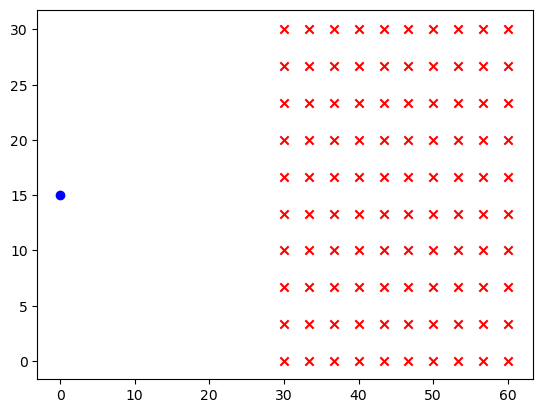

In [359]:
import matplotlib.pyplot as plt
import numpy as np
# Define the coordinates of the point
x = np.linspace(30, 60, 10)
y = np.linspace(0,30,10)
distance = np.zeros([len(x),len(y)])
point = [0,15]
plt.scatter(0,15, marker='o', color='blue' )

# Plot the point
for i in y:
    for j in x:
        plt.scatter(j,i, marker='x', color='red' )

# Set labels and title
plt.title('')

for i in range(len(x)):
    for j in range(len(y)):
        x_sum = (point[0]-x[i])**2
        y_sum = (point[1]-y[j])**2
        distance[i][j] = (np.sqrt(x_sum + y_sum))

print(distance)
plt.show()

In [363]:
class polynomial:

    #https://www.w3schools.com/python/python_classes.asp

    def __init__(self,x0,dx0,ddx0,x1,dx1,ddx1,t,dt):
        
        x0 = np.asarray(x0)
        dx0 = np.asarray(dx0)
        ddx0 = np.asarray(ddx0)
        x1 = np.asarray(x1)
        dx1 = np.asarray(dx1)
        ddx1 = np.asarray(ddx1)
        self.dt = dt
        self.t = t
            
        
        a0 = np.asarray(x0)
        a1 = np.asarray(dx0)
        a2 = np.asarray(np.divide(ddx0 , 2))
        a3 =  (20 * x1 - 20 * x0 - (8 * dx1 + 12 * dx0) * t - (3 * ddx0 - ddx1) * t**2) / (2 * t**3)
        a4 =  (30 * x0 - 30 * x1 + (14 * dx1 + 16 * dx0) * t + (3 * ddx0 - 2 * ddx1) * t**2 ) / (2 * t**4)
        a5 =  (12 * x1 - 12 * x0 - (6 * dx1 + 6 * dx0) * t - (ddx0 - ddx1) * t**2 ) /  (2 * t**5)

        self.a = [a5, a4, a3, a2, a1, a0]

    def trajectory_at_time(self, t):
        
        a5 = np.asarray(self.a[0])
        a4 = np.asarray(self.a[1])
        a3 = np.asarray(self.a[2])
        a2 = np.asarray(self.a[3])
        a1 = np.asarray(self.a[4])
        a0 = np.asarray(self.a[5])


        y = a5 * t**5 + a4 * t**4 + a3 * t**3 + a2 * t**2 + a1 * t + a0

        return y
    
    def whole_trajectory(self):
        #vector form 0 to t with number of elements t/dt
        time_split = np.linspace(0, self.t, int(self.t/self.dt))

        #generates len(time_split)+1 array of 0
        trajectroy = [0]*(len(time_split)+1)  
        j = 0
        for i in time_split:
            trajectroy[j] = self.trajectory_at_time(i)
            j += 1


"""
        num_steps = int(t/dt + 1)
        # Create arrays of zeros
        y = np.zeros((2, num_steps), dtype=np.int32)
        dy = np.zeros((2, num_steps), dtype=np.int32)
        ddy = np.zeros((2, num_steps), dtype=np.int32)

        for i in range(len(y)):
              i_t = (i-1)*dt;
              y(i) = a(1) * i_t^5 + a(2) * i_t^4 + a(3) * i_t^3 + a(4) * i_t^2 + a(5) * i_t + a(6);
              dy(i) = 5 * a(1) * i_t^4 + 4 * a(2) * i_t^3 + 3 * a(3) * i_t^2 + 2 * a(4) * i_t + a(5);
              ddy(i) = 20 * a(1) * i_t^3 + 12 * a(2) * i_t^2 + 6 * a(3) * i_t + 2 * a(4);
"""

'\n        num_steps = int(t/dt + 1)\n        # Create arrays of zeros\n        y = np.zeros((2, num_steps), dtype=np.int32)\n        dy = np.zeros((2, num_steps), dtype=np.int32)\n        ddy = np.zeros((2, num_steps), dtype=np.int32)\n\n        for i in range(len(y)):\n              i_t = (i-1)*dt;\n              y(i) = a(1) * i_t^5 + a(2) * i_t^4 + a(3) * i_t^3 + a(4) * i_t^2 + a(5) * i_t + a(6);\n              dy(i) = 5 * a(1) * i_t^4 + 4 * a(2) * i_t^3 + 3 * a(3) * i_t^2 + 2 * a(4) * i_t + a(5);\n              ddy(i) = 20 * a(1) * i_t^3 + 12 * a(2) * i_t^2 + 6 * a(3) * i_t + 2 * a(4);\n'

In [365]:
test_trajectory = polynomial([0,7],[0,0],[0,0],[10,3.14],[0,0],[0,0],3,0.01)
print(test_trajectory.trajectory_at_time(0))

print(test_trajectory.whole_trajectory())

[0. 7.]
None
